In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

# Problem 3.1

In [2]:
L = me.ReferenceFrame('L')  # The laboratory frame
C = me.ReferenceFrame('C')  # The disc frame
R = me.ReferenceFrame('R')  # The rod frame
q1, q2 = me.dynamicsymbols('q1, q2')
r = sm.symbols('r', real=True)
t = me.dynamicsymbols._t
C.orient(L, 'Axis', (q1, L.x))
R.orient(C, 'Axis', (q2, C.y))

In [3]:
O, P = sm.symbols('O, P', cls=me.Point)

In [4]:
P.set_pos(O, r*C.y - 3*r*R.x)

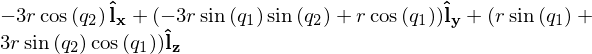

In [5]:
P.pos_from(O).express(L)

If you express in L and differeniate each measure number you get these measure numbers of P in L:

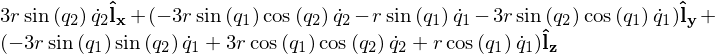

In [6]:
L_v_P = (P.pos_from(O).dot(L.x).diff(t) * L.x +
         P.pos_from(O).dot(L.y).diff(t) * L.y +
         P.pos_from(O).dot(L.z).diff(t) * L.z)
L_v_P

In [7]:
L_v_P.express(C).simplify()

Same as doing:

In [8]:
P.pos_from(O).dt(L).express(C).simplify()

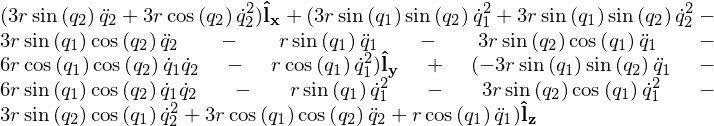

In [9]:
L_a_P = (L_v_P.dot(L.x).diff(t) * L.x +
         L_v_P.dot(L.y).diff(t) * L.y +
         L_v_P.dot(L.z).diff(t) * L.z)
L_a_P

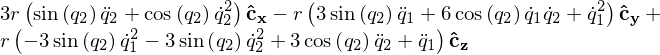

In [10]:
L_a_P.express(C).simplify()

In [11]:
C_v_P = (P.pos_from(O).dot(C.x).diff(t) * C.x +
         P.pos_from(O).dot(C.y).diff(t) * C.y +
         P.pos_from(O).dot(C.z).diff(t) * C.z)
C_v_P

In [12]:
C_a_P = (C_v_P.dot(C.x).diff(t) * C.x +
         C_v_P.dot(C.y).diff(t) * C.y +
         C_v_P.dot(C.z).diff(t) * C.z)
C_a_P

# Problem 3.3

Setup the problem like 2.7.

In [13]:
q1, q2, q3, q4, q5 = me.dynamicsymbols('q1:6')
R = sm.symbols('R')
A = me.ReferenceFrame('A')
Y = me.ReferenceFrame('Y')  # intermediate frame so that simple rotations can be used
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')
Y.orient(A, 'Axis', (q1, A.z))
B.orient(Y, 'Axis', (sm.pi/2 - q2, Y.x))
C.orient(B, 'Axis', (q3, B.z))

Define some new variables for use in defining velocities.

In [14]:
u1, u2, u3, u4, u5 = me.dynamicsymbols('u1:6')

Create the points of interest.

In [15]:
O, P, Cs = sm.symbols('O, P, C^*', cls=me.Point)

Set the relative positions of the points.

In [16]:
P.set_pos(O, q4 * A.x + q5 * A.y)

In [17]:
Cs.set_pos(P, R * B.y)

$u_1,u_2,u_4$ are equal to the measure numbers of the angular velocity of C in A as described in Problem 2.7.

In [18]:
C.ang_vel_in(A).express(B)

Set the velocity of P in A using the u's.

In [19]:
P.set_vel(A, u4*A.x + u5*A.y)

$C^*$ and $P$ are both fixed in B, so apply the two point theory:

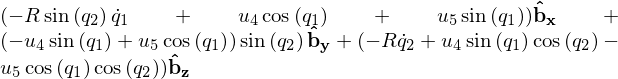

In [20]:
Cs.v2pt_theory(P, A, B).express(B).simplify()

Note that this has qdots present and we only want this velocity interms of the u's. So, solve for the qdots and substitute them in.

In [21]:
eqs = [C.ang_vel_in(A).dot(B.x) - u1,
       C.ang_vel_in(A).dot(B.y) - u2,
       C.ang_vel_in(A).dot(B.z) - u3]

In [22]:
qdots = sm.solve(eqs, q1.diff(), q2.diff(), q3.diff())

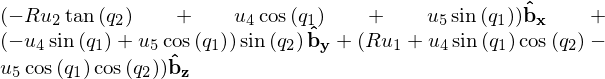

In [23]:
Cs.v2pt_theory(P, A, B).express(B).subs(qdots).simplify()

# Problem 3.4

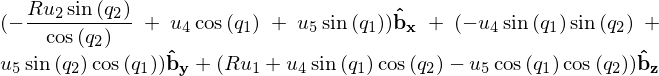

In [24]:
A_v_Cs = Cs.v2pt_theory(P, A, B).subs(qdots).express(B)
A_v_Cs

Time differentiate the velcity vector (use the one with only u's) and then substitute in the qdots.

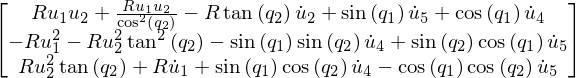

In [25]:
A_v_Cs.dt(A).subs(qdots).simplify().to_matrix(B)

# Problem 3.6

In [26]:
Ch = me.Point('C_h')

In [27]:
Ch.set_pos(Cs, -R*B.y)

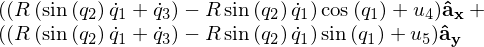

In [28]:
A_v_Ch = Cs.vel(A) + me.cross(C.ang_vel_in(A), Ch.pos_from(Cs))
A_v_Ch.express(A)

In [29]:
A_v_Ch.express(A).subs(qdots).simplify()

`v2pt_theory()` gives the same result:

In [30]:
Ch.v2pt_theory(Cs, A, C).express(A).subs(qdots).simplify()

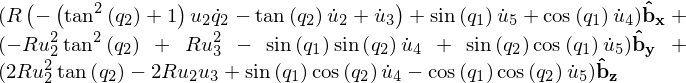

In [31]:
A_a_Ch = (Cs.acc(A) + me.cross(C.ang_acc_in(A), Ch.pos_from(Cs)) + 
          me.cross(C.ang_vel_in(A), me.cross(C.ang_vel_in(A), Ch.pos_from(Cs))))
A_a_Ch.express(B).subs(qdots).simplify()

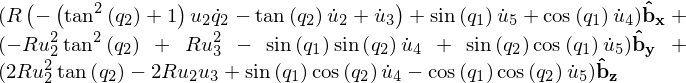

In [32]:
Ch.a2pt_theory(Cs, A, C).express(B).subs(qdots).simplify()

# Problem 3.10

Key things to note:

- ${}^R\mathbf{v}^A = 0$ for pure rolling on the vertical surface, where A is the contact point on the vertical surface
- ${}^R\mathbf{v}^B = 0$ for pure rolling on the horizontal surface, where B is the contact point on the horizontal surface
- ${}^R\mathbf{v}^{P_c} = {}^R\mathbf{v}^{P_s}$ for pure rolling between cone and sphere where $P_c$ and $P_s$ are the points at P in C and S respectively
- ${}^S\omega^C \cdot \hat{n} = 0$ ensures that the angular velocity of the cone C in the sphere S is parallel to the cone surface if $\hat{\mathbf{n}}$ is normal to the tangent line at the contact between cone and sphere. **Note that this is C and S!**

These are constant with respect to time:

In [33]:
theta, b, r = sm.symbols('theta, b, r')

These three reference frames are needed.

In [34]:
R, S, C = sm.symbols('R, S, C', cls=me.ReferenceFrame)

Create some measure numbers for the angular velocities that we will eventually solve for.

In [35]:
wc, ws1, ws2, ws3 = me.dynamicsymbols('omega_c, omega_{s1}, omega_{s2}, omega_{s3}')

The cone spins about the vertical axis.  **Note that all velocities will be define using the C unit vectors.**

In [36]:
C.set_ang_vel(R, wc*C.y)

The angular velocity of the sphere can be anything if the sphere slips and rolls on the surfaces (the general case).

In [37]:
S.set_ang_vel(R, ws1*C.x + ws2*C.y + ws3*C.z)

Create some points that are needed and defined above.

In [38]:
Pc, Ps, Ss, A, B, O = sm.symbols('P_c, P_s, S^*, A, B, O', cls=me.Point)

Now, the positions of A and B can be set relative to $S^*$, the sphere's center. This will allow us to use the two point theorem to calculate velocities since $S^*,A,B$ all all fixed in S.

In [39]:
A.set_pos(Ss, r*C.x)
B.set_pos(Ss, -r*C.y)

We know that:

$$
{}^R\mathbf{v}^A = 0 = {}^R\mathbf{v}^{S^*} + {}^R\omega^S \times \mathbf{r}^{A/S^*}  \\
{}^R\mathbf{v}^B = 0 = {}^R\mathbf{v}^{S^*} + {}^R\omega^S \times \mathbf{r}^{B/S^*}
$$

thus also:

$$
 {}^R\mathbf{v}^{S^*} = {}^R\mathbf{v}^A - {}^R\omega^S \times \mathbf{r}^{A/S^*}  \\
 {}^R\mathbf{v}^{S^*} = {}^R\mathbf{v}^B - {}^R\omega^S \times \mathbf{r}^{B/S^*}
$$


In [40]:
R_v_Ss__A = -S.ang_vel_in(R).cross(A.pos_from(Ss))
R_v_Ss__A

In [41]:
R_v_Ss__B = -S.ang_vel_in(R).cross(B.pos_from(Ss))
R_v_Ss__B

These are two expressions for the velocity of $S^*$ in R and thus they should equate. We can use that fact to solve for the measure numbers.

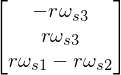

In [42]:
(R_v_Ss__B - R_v_Ss__A).to_matrix(C)

In [43]:
sol = sm.solve((R_v_Ss__A - R_v_Ss__B).to_matrix(C), ws2, ws3)
sol

Now substitute these measure numbers into the velocities we need.

In [44]:
S.ang_vel_in(R).subs(sol)

In [45]:
S.set_ang_vel(R, S.ang_vel_in(R).subs(sol))
S.ang_vel_in(R)

In [46]:
R_v_Ss__A.subs(sol)

In [47]:
Ss.set_vel(R, R_v_Ss__A.subs(sol))
Ss.vel(R)

$\hat{\mathbf{n}}$ is the vector normal to the cone's surface pointing from $S^*$ towards the cone's spin axis.

In [48]:
n = -sm.cos(theta)*C.x + sm.sin(theta)*C.y

Now the velocity of the point P on S can be found.

In [49]:
Ps.set_pos(Ss, r*n)

In [50]:
Ps.v2pt_theory(Ss, R, S)

The position to $P_c$ takes a bit of geometry to locate relative to O:

In [51]:
Pc.set_pos(O, (r+r*sm.sin(theta))*C.y + (b-r*sm.cos(theta))*C.x)

Now, both O and $P_c$ are fixed in C, so the two point theorem can be used.

In [52]:
O.set_vel(R, 0)

In [53]:
Pc.v2pt_theory(O, R, C)

Recall ${}^R\mathbf{v}^{P_c} = {}^R\mathbf{v}^{P_s}$. We can form the expression on the left side of: $\left({}^R\mathbf{v}^{P_c} - {}^R\mathbf{v}^{P_s}\right)\cdot\hat{\mathbf{c}}_z = 0$ (there is only a $\hat{\mathbf{c}}_z$ component).

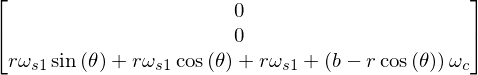

In [54]:
(Ps.vel(R) - Pc.vel(R)).to_matrix(C)

Use this one equation to solve for the last measure number.

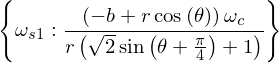

In [55]:
sol = sm.solve((Ps.vel(R) - Pc.vel(R)).to_matrix(C), ws1)
sol

Also recall that ${}^S\omega^C \cdot \hat{n} = 0$ and we can form the necessary angular velocity using the addition theorem:

In [56]:
S_w_C = C.ang_vel_in(R) - S.ang_vel_in(R)
S_w_C

Now, solve this expression for $b$:

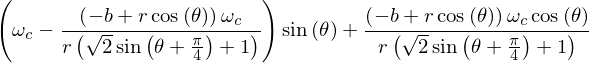

In [57]:
zero = S_w_C.dot(n).subs(sol)
zero

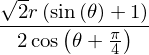

In [58]:
b_sol = sm.solve(zero, b)[0]
b_sol

SymPy simplies this into a seemingly less simple solution. You can check that this is the correct solution by seeing if you solution minus the expected solution result in zero when simplified.

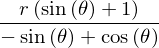

In [59]:
b_expected = r*(1+sm.sin(theta))/(sm.cos(theta)-sm.sin(theta))
b_expected

In [60]:
sm.trigsimp((b_sol - b_expected))